# Kaggle案例泰坦尼克号生存预测分析


## 查看数据<br>
用pandas加载数据

In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
data_train=pd.read_csv('train.csv')
data_train.head()
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


有以下这些字段<br>
PassengerId => 乘客ID<br>
Survived => 生存<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口

### 数据简单描述性分析

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 训练数据中总共有891名乘客，但是我们有些属性的数据不全，比如说：<br>

* Age（年龄）属性只有714名乘客有记录
* Cabin（客舱）更是只有204名乘客是已知的<br>
具体数据数值情况，我们用下列的方法，得到数值型数据的一些分布

In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


mean字段告诉我们，大概0.383838的人最后获救了，平均乘客年龄大概是29.7岁

# 通过可视化的方式深入了解数据

## 获救情况人数可视化

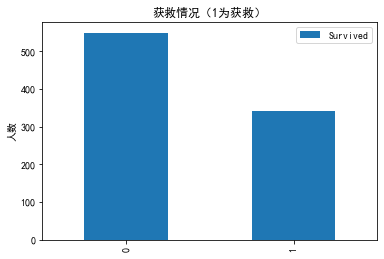

In [5]:
import matplotlib.pyplot as plt

# 显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif']=['Simhei']  #显示中文
mpl.rcParams['axes.unicode_minus']= False

data_train.Survived.value_counts().plot(kind='bar')
plt.title('获救情况（1为获救）')
plt.ylabel('人数')
plt.legend()
plt.show()

## 乘客等级分布可视化

3    491
1    216
2    184
Name: Pclass, dtype: int64


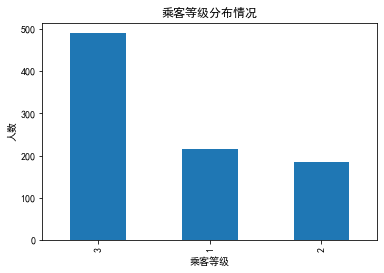

In [6]:
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel('人数')
plt.xlabel('乘客等级')
plt.title('乘客等级分布情况')
print(data_train.Pclass.value_counts())

## 按年龄看获救分布可视化

<AxesSubplot:ylabel='Frequency'>

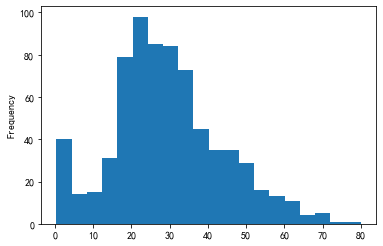

In [11]:
data_train['Age'].plot.hist(bins=20)

In [ ]:
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel('年龄')
plt.grid(axis='y')
plt.title('按照年龄看获救分布可视化（1为获救）')
plt.show()

## 各等级的乘客年龄分布

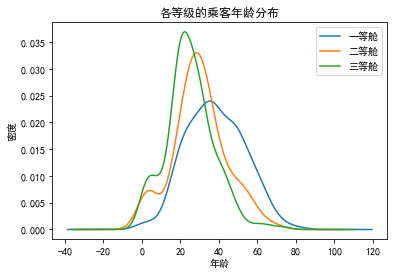

In [18]:
# 各等级的乘客年龄分布密度图
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel('年龄')
plt.ylabel('密度')
plt.title('各等级的乘客年龄分布')
plt.legend(('一等舱','二等舱','三等舱'))
plt.show()

## 各登船口岸上船人数可视化

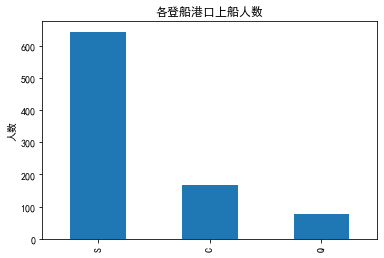

In [19]:
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('各登船港口上船人数')
plt.ylabel('人数')
plt.show()

### 所以我们在图上可以看出来:<br>
* 被救的人300多点，不到半数；<br>
* 3等舱乘客非常多；遇难和获救的人年龄跨度都很广；<br>
* 3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多<br>
* 登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。><br><br>

## 查看每一个属性与获救情况的可视化


## 各乘客等级的获救情况

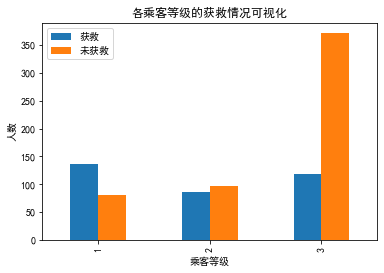

In [20]:
#看看各乘客等级的获救情况
Survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
# Survived_1
Survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
df=pd.DataFrame({'获救':Survived_1,'未获救':Survived_0})
df.plot(kind='bar')

plt.title('各乘客等级的获救情况可视化')
plt.xlabel('乘客等级')
plt.ylabel('人数')
# plt.legend()

plt.show()


## 各登船港口对于获救情况分析

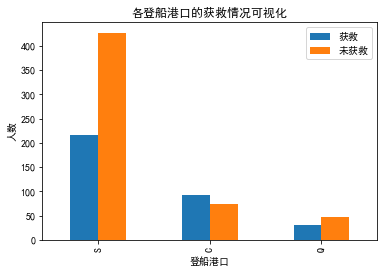

In [21]:
#看看各登船港口的获救情况
Survived_1=data_train.Embarked[data_train.Survived==1].value_counts()
# Survived_1
Survived_0=data_train.Embarked[data_train.Survived==0].value_counts()
df=pd.DataFrame({'获救':Survived_1,'未获救':Survived_0})
df.plot(kind='bar')

plt.title('各登船港口的获救情况可视化')
plt.xlabel('登船港口')
plt.ylabel('人数')
# plt.legend()

plt.show()

## 各性别的获救情况

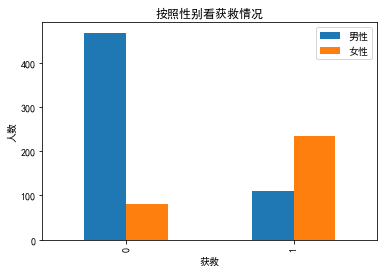

In [22]:
#看看各性别的获救情况
Survived_m=data_train.Survived[data_train.Sex=='male'].value_counts()
# Survived_m
Survived_f=data_train.Survived[data_train.Sex=='female'].value_counts()
df=pd.DataFrame({'男性':Survived_m,'女性':Survived_f})
df.plot(kind='bar')

plt.title('按照性别看获救情况')
plt.xlabel('获救')
plt.ylabel('人数')
plt.show()

获救的女性要多于男性。

### 堂兄弟和父母字段对于获救情况分析


In [23]:
# 堂兄弟/妹个数
data_train.pivot_table(index=['SibSp', 'Survived'], values='PassengerId', aggfunc='count')

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [24]:
# 父母个数
data_train.pivot_table(index=['Parch', 'Survived'], values='PassengerId', aggfunc='count')

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

#### ticket是船票编号，是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴  
#### cabin只有204个乘客有值，我们先看看它的一个分布

In [25]:
#cabin只有204个乘客有值，我们先看看它的一个分布
data_train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
D              3
              ..
D45            1
B71            1
A14            1
D30            1
C95            1
Name: Cabin, Length: 147, dtype: int64

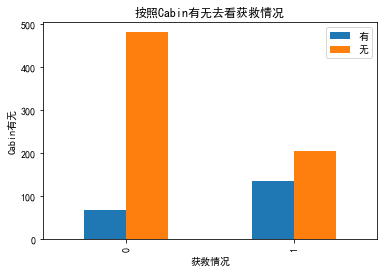

In [26]:
# 分析cabin这个值的有无，对于survival的分布状况
survival_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
survival_cabin
survival_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'有':survival_cabin,'无':survival_nocabin})
df.plot(kind='bar')
plt.title('按照Cabin有无去看获救情况')
plt.xlabel('获救情况')
plt.ylabel('Cabin有无')
plt.show()

有Cabin记录的似乎获救概率稍高一些

## 数据预处理

In [27]:
# 打印数据前几行
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 数据缺失值处理

In [28]:
# 查看数据
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#补充Age的缺失值
data_train['Age']=data_train['Age'].fillna(data_train['Age'].mean())

#按Cabin有无数据，将这个属性处理成Yes和No两种类型
def set_cabin(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df
data_train=set_cabin(data_train)

In [30]:
#对Embarked进行填充数据
data_train['Embarked']=data_train['Embarked'].fillna('S')

In [31]:
# 查看数据
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 数据one-hot处理

因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化/one-hot编码<br>
什么叫做因子化/one-hot编码？举个例子<br>
以Embarked为例，原本一个属性维度，因为其取值可以是[‘S’,’C’,’Q‘]，而将其平展开为’Embarked_C’,’Embarked_S’, ‘Embarked_Q’三个属性<br>
* 原本Embarked取值为S的，在此处的”Embarked_S”下取值为1，在’Embarked_C’, ‘Embarked_Q’下取值为0<br>
* 原本Embarked取值为C的，在此处的”Embarked_C”下取值为1，在’Embarked_S’, ‘Embarked_Q’下取值为0<br>
* 原本Embarked取值为Q的，在此处的”Embarked_Q”下取值为1，在’Embarked_C’, ‘Embarked_S’下取值为0<br>
* 我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上<br>

In [33]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
# Cabin,Embarked,Pclass,Sex
dummies_Cabin=pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked=pd.get_dummies(data_train['Embarked'],prefix='Cabin')
dummies_Pclass=pd.get_dummies(data_train['Pclass'],prefix='Pclass')
dummies_Sex=pd.get_dummies(data_train['Sex'],prefix='Sex')

df=pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Cabin_C,Cabin_Q,Cabin_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1


In [35]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Cabin_C,Cabin_Q,Cabin_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066,0.352413,0.647587
std,257.353842,0.486592,13.002015,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665,0.477990,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 数据标准化处理

我们还得做一些处理，Age和Fare两个属性，乘客的数值幅度变化太大,进行标准差标准化处理

In [36]:
a=df.Age
df['Age_scaled']=(a-a.mean())/(a.std())
df=df.drop('Age',axis=1)

b=df.Fare
df['Fare_scaled']=(b-b.mean())/(b.std())
df=df.drop('Fare',axis=1)
df.head()

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Cabin_C,Cabin_Q,Cabin_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,-0.592148,-0.502163
1,2,1,1,0,0,1,1,0,0,1,0,0,1,0,0.638430,0.786404
2,3,1,0,0,1,0,0,0,1,0,0,1,1,0,-0.284503,-0.488580
3,4,1,1,0,0,1,0,0,1,1,0,0,1,0,0.407697,0.420494
4,5,0,0,0,1,0,0,0,1,0,0,1,0,1,0.407697,-0.486064


## 数据建模--逻辑回归

我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [37]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模
from sklearn import linear_model
train_df=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np=train_df.values
# y即Survival结果
y=train_np[:,0]
# X即特征属性值
X=train_np[:,1:]
# fit到RandomForestRegressor之中
clf=linear_model.LogisticRegression(penalty='l2')
clf.fit(X,y)
# 模型正确率
print(clf.score(X,y))
clf

ModuleNotFoundError: No module named 'sklearn'

penalty：惩罚项，str类型，可选参数为l1和l2，默认为l2。用于指定惩罚项中使用的规范。newton-cg、sag和lbfgs求解算法只支持L2规范。L1G规范假设的是模型的参数满足拉普拉斯分布，L2假设的模型参数满足高斯分布，所谓的范式就是加上对参数的约束，使得模型更不会过拟合(overfit)<br>
tol：停止求解的标准，float类型，默认为1e-4。就是求解到多少的时候，停止，认为已经求出最优解。<br>
c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。<br>

接下来咱们对训练集和测试集做一样的操作

In [ ]:
# 读取测试集数据
data_test=pd.read_csv('test.csv')
data_test.head()

In [ ]:
# 描述分析数据
data_test.info()

In [ ]:

# 接着我们对test_data做和train_data中一致的特征变换
# 对Fare处理
data_test.loc[(data_test.Fare.isnull()),'Fare']=0
#补充Age的缺失值
data_test['Age']=data_test['Age'].fillna(data_test['Age'].mean())
#按Cabin有无数据，将这个属性处理成Yes和No两种类型
def set_Cabin(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df
data_test=set_cabin(data_test)

# one-hot编码
# Cabin,Embarked,Sex,Pclass
dummies_Cabin=pd.get_dummies(data_test['Cabin'],prefix='Cabin')
dummies_Embarked=pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_Pclass=pd.get_dummies(data_test['Pclass'],prefix='Pclass')
dummies_Sex=pd.get_dummies(data_test['Sex'],prefix='Sex')

df_test=pd.concat([data_test,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)

# 标准化处理数据  Age Fare
a=df_test.Age
df_test['Age_scaled']=(a-a.mean())/(a.std())
df_test=df_test.drop('Age',axis=1)

b=df_test.Fare
df_test['Fare_scaled']=(b-b.mean())/(b.std())
df_test=df_test.drop('Fare',axis=1)
df_test.head()

In [ ]:
test=df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions=clf.predict(test)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].values,
                     'Survived':predictions.astype(np.int32)})
result.to_csv('logistic_regression_predictions.csv',index=False)


In [ ]:
# 读取logistic_regression_predictions.csv数据
pd.read_csv('logistic_regression_predictions.csv').head(10)